In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
options(repr.plot.height=3.5)
options(repr.matrix.max.rows=10)

In [3]:
source("utility.R")
source("recommender.r")


Attaching package: ‘assertthat’

The following object is masked from ‘package:tibble’:

    has_name



## Load Real Data

Load MovieLens 100K data

In [4]:
ml.100k = read_tsv("data/ml-100k/u.data", 
                   col_names = c("userId", "movieId"),
                   col_types = "ii__")

  DataSet nuser nitem  pairs    density
1  ML100K   943  1682 100000 0.06304669


Profile Stats


     ML100K   
 Min.   : 20  
 1st Qu.: 33  
 Median : 65  
 Mean   :106  
 3rd Qu.:148  
 Max.   :737  


Popularity Stats


     ML100K      
 Min.   :  1.00  
 1st Qu.:  6.00  
 Median : 27.00  
 Mean   : 59.45  
 3rd Qu.: 80.00  
 Max.   :583.00  


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


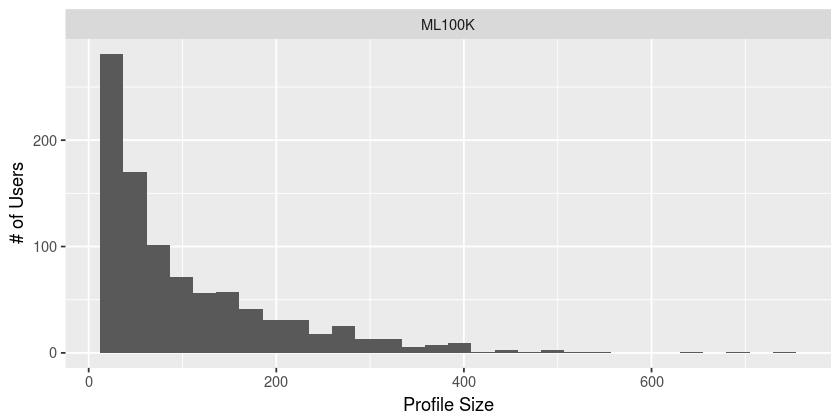

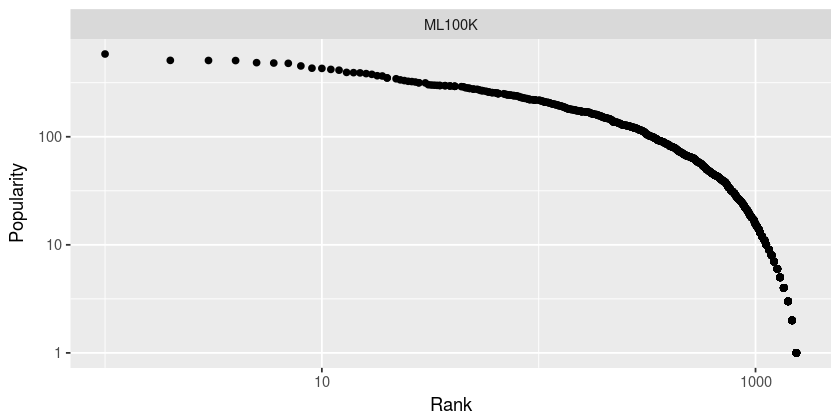

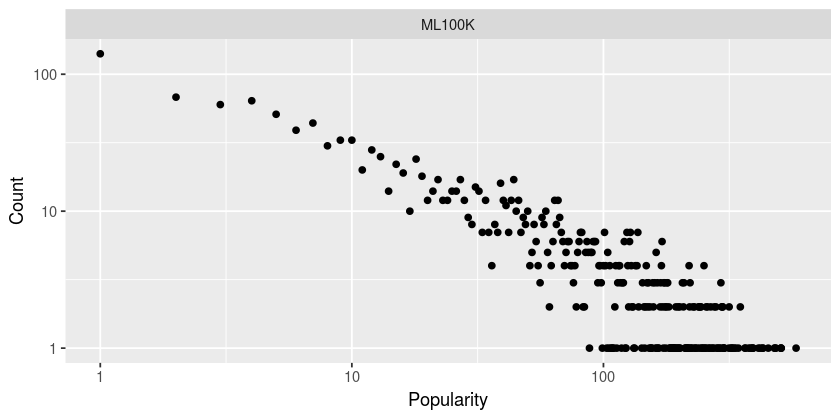

In [5]:
summarize_data_sets(ML100K=ml.100k)

## Generate Preference Data

- uniform random
- indian buffet process

In [6]:
unif.data = generate_uniform(943, 1682, 0.1)

In [7]:
ibp.data = generate_IBP(943, 1682 * 0.1)

sampled 162659 interactions for 943 users in 0.331217050552368 seconds


Summarize Ground Truth

  DataSet nuser nitem  pairs    density
1  IBP.GT   943  1254 162659 0.13755262
2 UNIF.GT   943  1682 158464 0.09990631


Profile Stats


     IBP.GT         UNIF.GT   
 Min.   :147.0   Min.   :122  
 1st Qu.:166.0   1st Qu.:159  
 Median :172.0   Median :168  
 Mean   :172.5   Mean   :168  
 3rd Qu.:179.0   3rd Qu.:177  
 Max.   :207.0   Max.   :206  


Popularity Stats


     IBP.GT         UNIF.GT      
 Min.   :  1.0   Min.   : 61.00  
 1st Qu.:  4.0   1st Qu.: 88.00  
 Median : 26.0   Median : 94.00  
 Mean   :129.7   Mean   : 94.21  
 3rd Qu.:159.0   3rd Qu.:101.00  
 Max.   :922.0   Max.   :128.00  
 NA's   :428                     


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


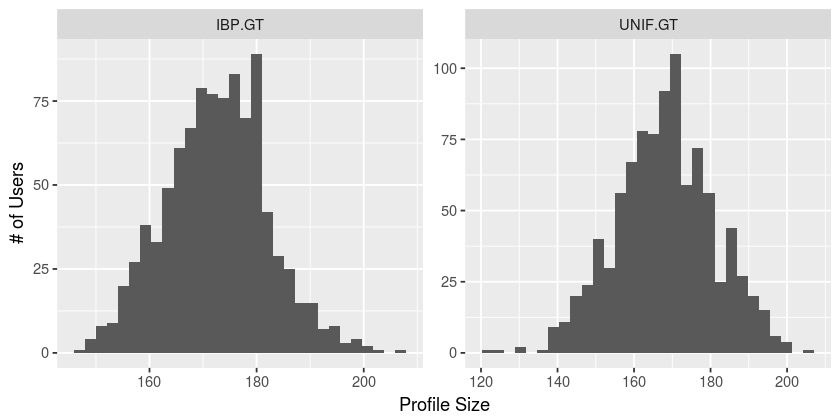

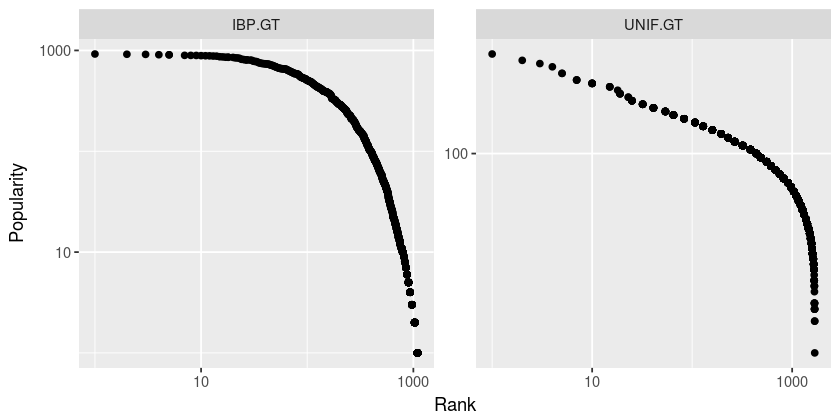

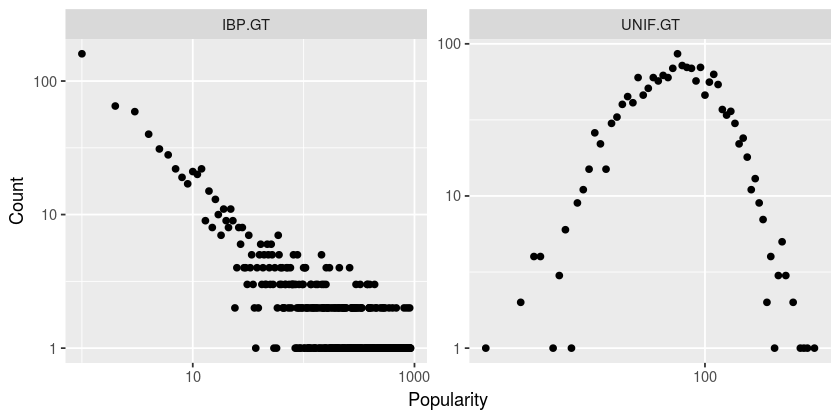

In [8]:
summarize_data_sets(UNIF.GT=unif.data,IBP.GT=ibp.data)

## Sampling Observation 

**Uniform sampling**

In [9]:
unif.sampling.unif.data = unif.data %>%
    group_by(userId) %>%
    sample_frac(0.1) %>%
    ungroup()

unif.sampling.ibp.data = ibp.data %>%
    group_by(userId) %>%
    sample_frac(0.1) %>%
    ungroup()

Compare with ML100k
- OUU: Observations of Uniformly sampling Uniform random preferences
- OUI: Observations of Uniformly sampling Indian buffet process prefer

  DataSet nuser nitem  pairs     density
1  ML100K   943  1682 100000 0.063046694
2     OUI   943   883  16272 0.019541979
3     OUU   943  1682  15850 0.009992901


Profile Stats


     ML100K         OUI             OUU       
 Min.   : 20   Min.   :15.00   Min.   :12.00  
 1st Qu.: 33   1st Qu.:17.00   1st Qu.:16.00  
 Median : 65   Median :17.00   Median :17.00  
 Mean   :106   Mean   :17.26   Mean   :16.81  
 3rd Qu.:148   3rd Qu.:18.00   3rd Qu.:18.00  
 Max.   :737   Max.   :21.00   Max.   :21.00  


Popularity Stats


     ML100K            OUI              OUU        
 Min.   :  1.00   Min.   :  1.00   Min.   : 1.000  
 1st Qu.:  6.00   1st Qu.:  2.00   1st Qu.: 7.000  
 Median : 27.00   Median :  8.00   Median : 9.000  
 Mean   : 59.45   Mean   : 18.43   Mean   : 9.423  
 3rd Qu.: 80.00   3rd Qu.: 27.00   3rd Qu.:12.000  
 Max.   :583.00   Max.   :120.00   Max.   :21.000  
                  NA's   :799                      


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


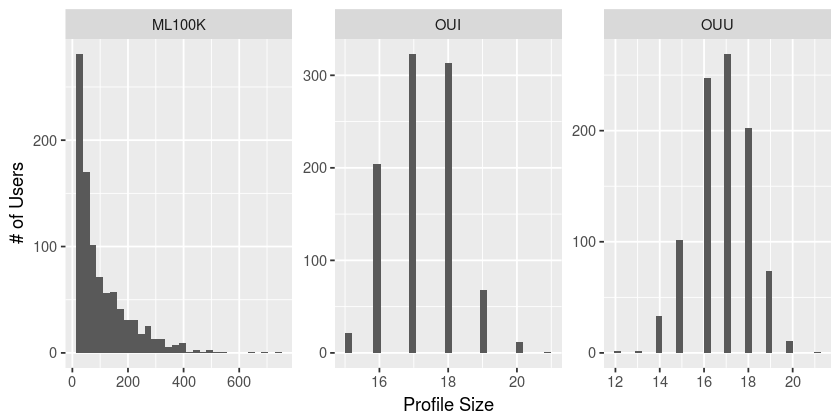

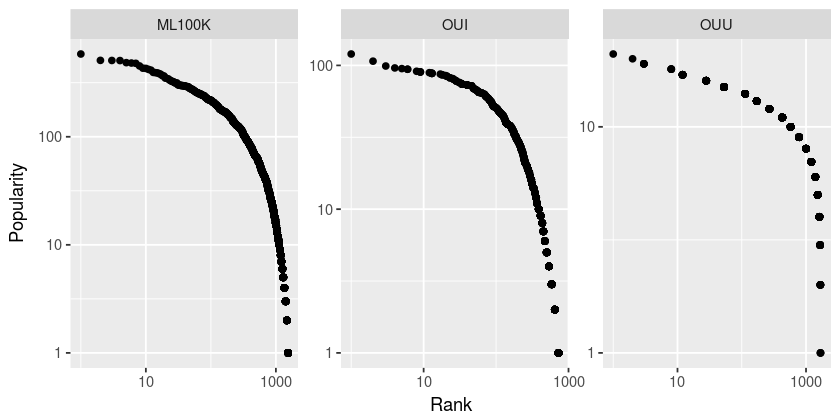

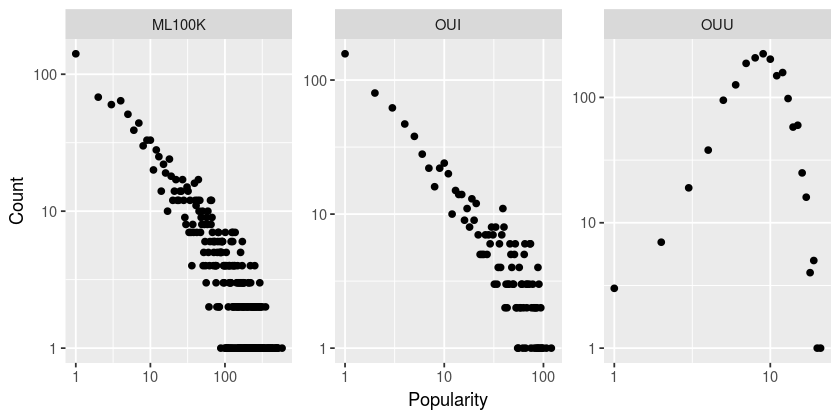

In [10]:
summarize_data_sets(OUU=unif.sampling.unif.data, OUI=unif.sampling.ibp.data, ML100K=ml.100k)

**Popularity sampling**

calculate popularity

In [11]:
unif.popularity = unif.data %>%
    group_by(itemId) %>%
    summarize(prob = n()) %>%
    ungroup() %>%
    mutate(prob = prob / sum(prob))

ibp.popularity = ibp.data %>%
    group_by(itemId) %>%
    summarize(prob = n()) %>%
    ungroup() %>%
    mutate(prob = prob / sum(prob))

In [12]:
pop.sampling.unif.data = unif.data %>%
    inner_join(unif.popularity) %>%
    group_by(userId) %>%
    sample_frac(size = 0.1, weight = prob) %>%
    ungroup() %>%
    select(-prob)

pop.sampling.ibp.data = ibp.data %>%
    inner_join(ibp.popularity) %>%
    group_by(userId) %>%
    sample_frac(size = 0.1, weight = prob) %>%
    ungroup() %>%
    select(-prob)

Joining, by = "itemId"
Joining, by = "itemId"


Compare with ML100k

  DataSet nuser nitem  pairs     density
1  ML100K   943  1682 100000 0.063046694
2     OPI   943   531  16272 0.032496360
3     OPU   943  1682  15850 0.009992901


Profile Stats


     ML100K         OPI             OPU       
 Min.   : 20   Min.   :15.00   Min.   :12.00  
 1st Qu.: 33   1st Qu.:17.00   1st Qu.:16.00  
 Median : 65   Median :17.00   Median :17.00  
 Mean   :106   Mean   :17.26   Mean   :16.81  
 3rd Qu.:148   3rd Qu.:18.00   3rd Qu.:18.00  
 Max.   :737   Max.   :21.00   Max.   :21.00  


Popularity Stats


     ML100K            OPI              OPU        
 Min.   :  1.00   Min.   :  1.00   Min.   : 1.000  
 1st Qu.:  6.00   1st Qu.:  2.00   1st Qu.: 7.000  
 Median : 27.00   Median : 10.00   Median : 9.000  
 Mean   : 59.45   Mean   : 30.64   Mean   : 9.423  
 3rd Qu.: 80.00   3rd Qu.: 40.00   3rd Qu.:12.000  
 Max.   :583.00   Max.   :193.00   Max.   :24.000  
                  NA's   :1151                     


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


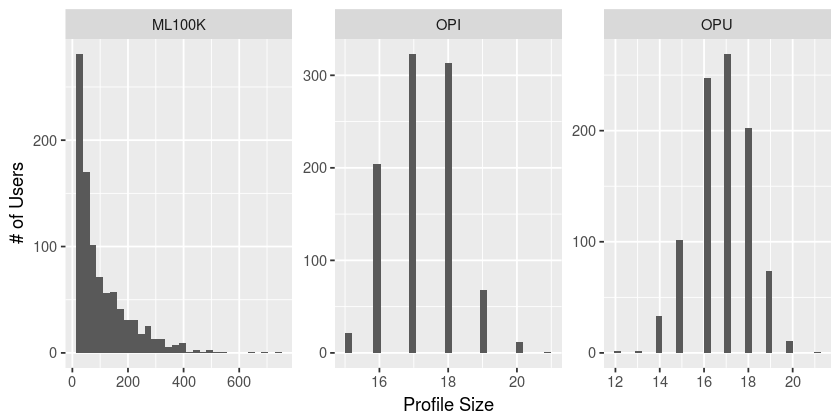

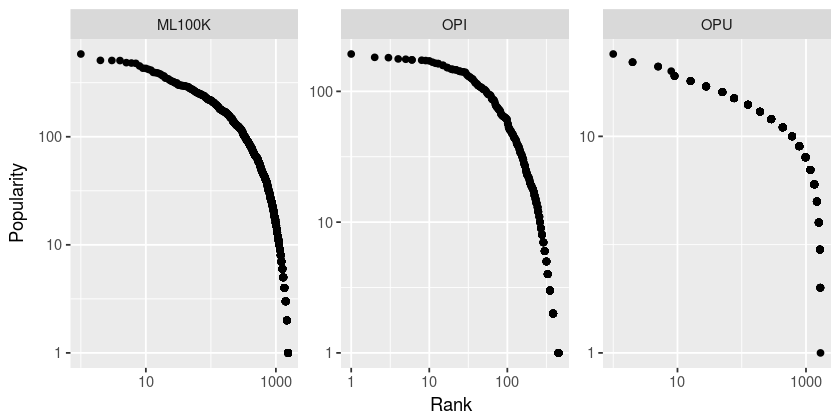

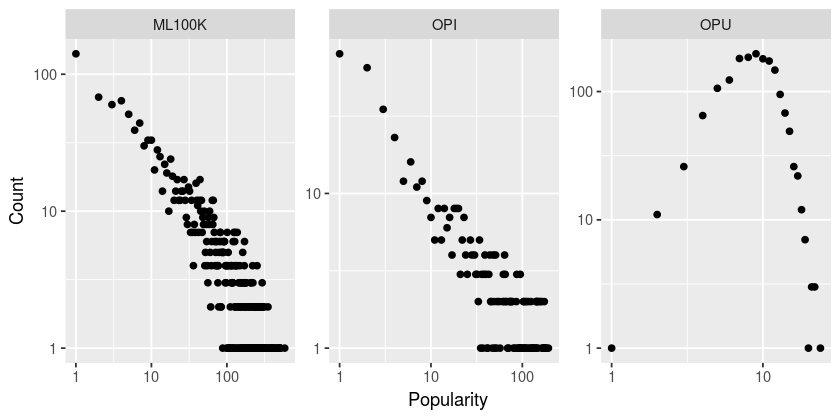

In [13]:
summarize_data_sets(OPU=pop.sampling.unif.data, OPI=pop.sampling.ibp.data, ML100K=ml.100k)